In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn import linear_model


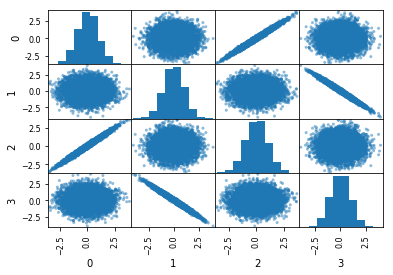

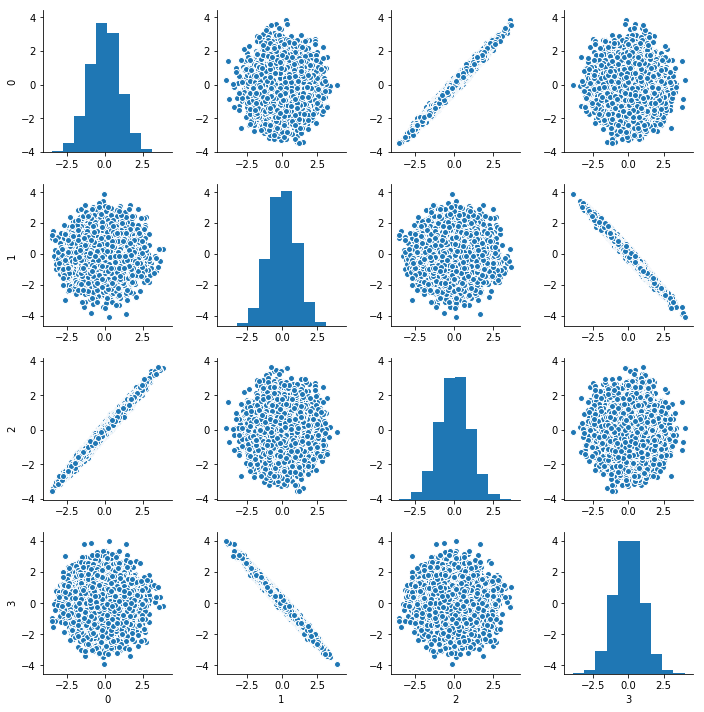

In [2]:
#Problem 1a)

df = pd.read_csv('Lab2_Data/DF1', header=0, index_col=0)

scatter_matrix(df)
sns.pairplot(df)

From the scatter plots, we can see that columns 0 and 2 and columns 3 and 1 are very correlated


In [3]:
#Problem 1b)

df.cov()

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


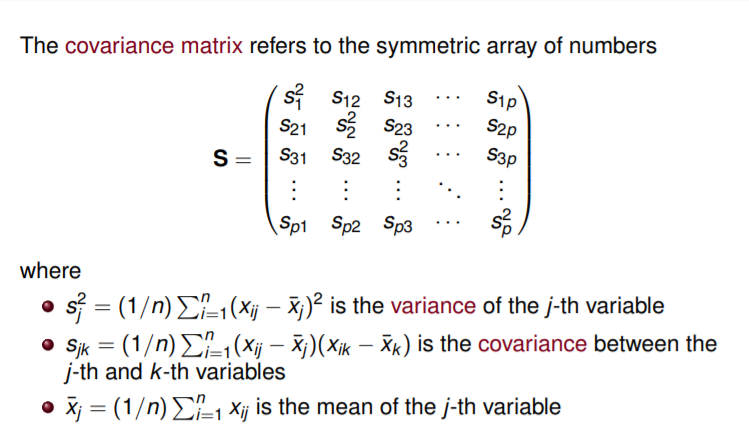

http://users.stat.umn.edu/~helwig/notes/datamat-Notes.pdf

The covariance of a matrix is defined with the formula above. Looking at our dataset, we see columns 0 and 2 have a correlation of 0.99 and columns 1 and 3 have a correlation of -0.99. This leads us to believe these sets of columns are correlated.

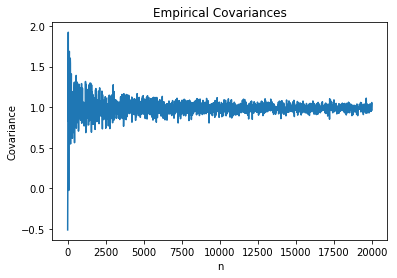

In [4]:
#Problem 1c)

mean = [0, 0, 0]
cov = [[5, 0, 0],
        [0, 5, 0.99],
        [0, 0.99, 5]]

rv = np.random.multivariate_normal(mean, cov, 100000)
df = pd.DataFrame(rv, columns = ['X1', 'X2', 'X3'])

samples = []
covariances = []

for numsamples in range(0, 20000, 10):
    rv = np.random.multivariate_normal(mean, cov, numsamples)
    covar23 = pd.DataFrame(rv, columns = ['X1', 'X2', 'X3']).cov().loc['X2']['X3']
    samples.append(numsamples)
    covariances.append(covar23)
    
plt.title('Empirical Covariances')
plt.xlabel('n')
plt.ylabel('Covariance')
plt.plot(samples, covariances)

Text(0.5,1,'Column 1 vs Column 0')

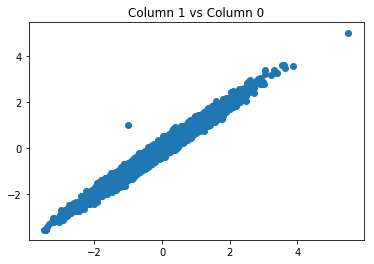

In [5]:
df = pd.read_csv('Lab2_Data\DF2', header=0, index_col=0)

plt.scatter(df['0'], df['1'])
plt.title("Column 1 vs Column 0")



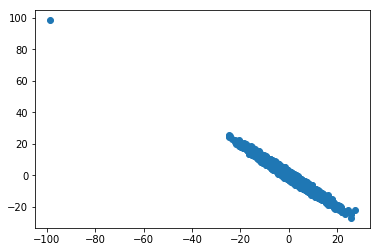

In [6]:
cov = df.cov()
cov_inverse = pd.DataFrame(np.linalg.pinv(cov.values))

#transform data
data = pd.DataFrame(np.dot(df, cov_inverse))
column_names = ['A', 'B']
data.columns = column_names

plt.scatter(data['A'], data['B'])

From the graph, we see (-1, 1) is the outlier. We used the Mahalanobis distance to scale distances so that the distances along a direction where the dataset is very spread out are scaled down, and distances along directions where the dataset is tightly packed are scaled up. So, the value of much higher variance will be farther away with this transformation. We see:

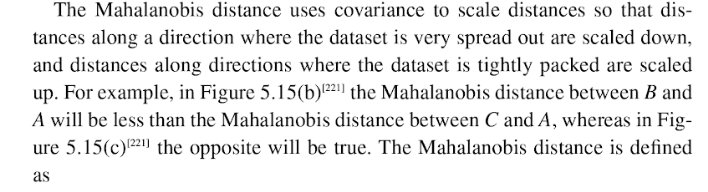

Source(page 222):https://books.google.com/books/about/Fundamentals_of_Machine_Learning_for_Pre.html?id=3EtQCgAAQBAJ&printsec=frontcover&source=kp_read_button#v=onepage&q&f=false

Emperical STD (150): 0.234602873705
The standard deviation is well above 0.15, so that beta hat is not very significant at all.


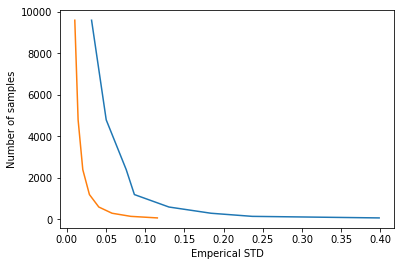

The blue curve is of the emperical STDs for different n and the orange curve is 1/sqrt(n). The fit is pretty close, they follow the same general trend, but 1/sqrt(n) has sharper transitions. 


In [33]:
#Problem 3
def empStdDev(n):
    errors = []
    
    for i in range(100):
        xi = np.random.randn(n)
        ei = np.random.randn(n)
        yi = -3 + xi*0 + ei
        betahat = np.dot(xi,yi) / np.dot(xi,xi)
        errors.append(betahat-0)
        
    return np.std(errors)

print("Emperical STD (150):",empStdDev(150))

print("The standard deviation is well above 0.15, so that beta hat is not very significant at all.")

nvals = [75,150,300,600,1200,2400,4800,9600]
devs = []
inv = []
for n in nvals:
    devs.append(empStdDev(n))
    inv.append(1/(n**(1/2)))
    
plt.plot(devs, nvals)
plt.plot(inv, nvals)
plt.ylabel("Number of samples")
plt.xlabel("Emperical STD")
plt.show()
    
print("The blue curve is of the emperical STDs for different n and the orange curve is 1/sqrt(n). The fit is pretty close, they follow the same general trend, but 1/sqrt(n) has sharper transitions. ")





In [ ]:
#Problem 4


#Program 1

def topNames (k, year):
    data = pd.read_csv('Names/Names/yob'+str(year)+'.txt', sep=",", header=None)
    names = data.iloc[0:k,0]
    return names.values

#print(topNames(4,1880))

#Program 2
numYears = (2015+1)-1880;

def nameFreq (name):
    
    fFreq = []
    mFreq = []
    
    for i in range(1880,2015+1):
        data = pd.read_csv('Names/Names/yob'+str(i)+'.txt', sep=",", header=None)
        dataN = data[data[0] == name]
        
        for j in range(0,dataN.shape[0]):
            if(dataN.iloc[j,1] == 'F'):
                fFreq.append(dataN.iloc[j,2])
            else:
                mFreq.append(dataN.iloc[j,2])
                
        
    return [mFreq, fFreq]

#print(nameFreq('Mary'))

#Program 2 (relative)
totalNames = [0] * numYears
for i in range(numYears):
        data = pd.read_csv('Names/Names/yob'+str(i+1880)+'.txt', sep=",", header=None)
        tN = 0
        for j in range(0,data.shape[0]):
            tN+=data.iloc[j,2]
        totalNames[i] = tN
        

def nameRelFreq (name):
    
    fFreq = [0] * numYears
    mFreq = [0] * numYears
    
    for i in range(numYears):
        data = pd.read_csv('Names/Names/yob'+str(i+1880)+'.txt', sep=",", header=None)
        dataN = data[data[0] == name]
        
        for j in range(0,dataN.shape[0]):
            if(dataN.iloc[j,1] == 'F'):
                fFreq[i] = dataN.iloc[j,2]/totalNames[i]
            else:
                mFreq[i] = dataN.iloc[j,2]/totalNames[i]
                
    result = np.array([mFreq, fFreq])
    return result

s=nameRelFreq('Mary')
#print(s.shape)
#print(s[0,0])


#All Names switching popularity

nameSwitched = []
namesT = []

for i in range(numYears):
    data = pd.read_csv('Names/Names/yob'+str(i+1880)+'.txt', sep=",", header=None)
    for j in range(0,data.shape[0]):
        name = data.iloc[j,0]
        duplicate = 0
        for k in range(0, len(namesT)):
            if(namesT[k] == name):
                duplicate = 1
                break
        if(duplicate == 1):
            break
        namesT.append(name)
        freqs = nameRelFreq(name)
        popularity = 0
        if(freqs[0,0] > freqs[1,0]):
            popularity = 1
        for k in range(numYears):
            if popularity == 0 and freqs[0,k] > freqs[1,k]:
                 nameSwitched.append(name)
            if popularity == 1 and freqs[0,k] < freqs[1,k]:
                 nameSwitched.append(name)
    
print(nameSwitched)

print("The code for nameSwitched should work, but it runs too slow on a laptop to get the results in a reasonable time.")

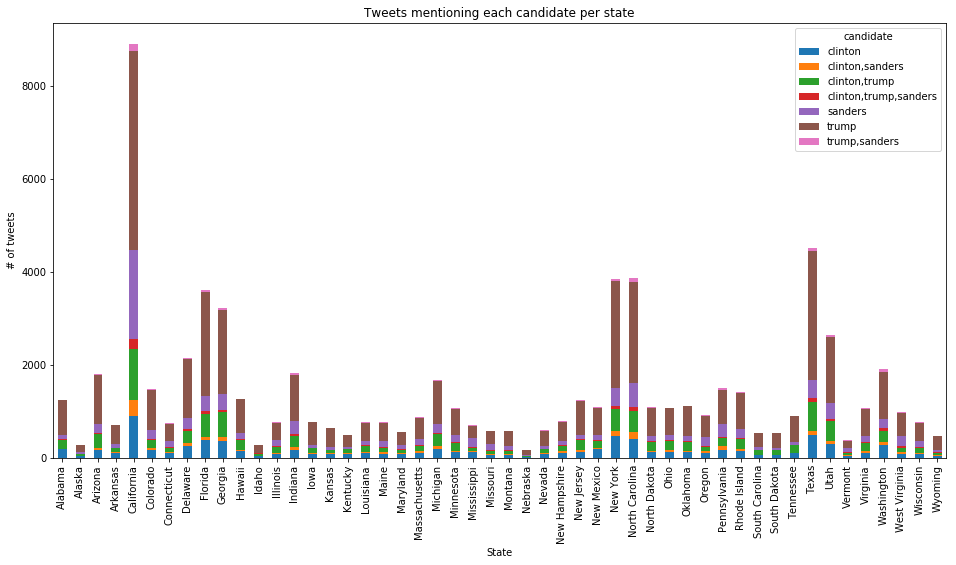

This state prediction is fairly poor. It assigns states to tweets based on the user_location information, searching for the first full state name or abbreviation. Most of the tweets in the set are missing because many have no user_location or one that doesn't explicitly mention their state


In [34]:
#Problem 5
#Tutorial code from https://www.dataquest.io/blog/matplotlib-tutorial/
#We looked through the code, ran it, and understand it
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)

stateName = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

stateAbbrv = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#Aggregating Results by States
def get_state(row):
    states = [];
    text = str(row);
    appended = 0;
    
    for i in range(50):
        if stateName[i] in text or stateAbbrv[i] in text:
            states.append(stateName[i])
            #states.append(i+1)
            appended = 1;            
            break
            
       #if appended == 0:
        #states.append("N/A")
        #states.append(0)
        
    return ",".join(states)

tweets["state"] = tweets["user_location"].apply(get_state)

tweets2 = tweets.groupby(['state', 'candidate'])['state'].count().unstack('candidate').fillna(0)
tweets3 = tweets2.iloc[1:tweets2.shape[0],1:tweets2.shape[1]]
tweets3.plot(kind='bar', stacked=True, figsize=[16,8])
plt.title("Tweets mentioning each candidate per state")
plt.xlabel("State")
plt.ylabel("# of tweets")
plt.show()

print("This state prediction is fairly poor. It assigns states to tweets based on the user_location information, searching for the first full state name or abbreviation. Most of the tweets in the set are missing because many have no user_location or one that doesn't explicitly mention their state")

